In [1]:
import os 


from tqdm import tqdm

In [3]:
dset = 'etth1'
cws = [24, 48, 96, 192, 336, 720]
epochs = 30

for cw in tqdm(cws):

    resnet = f"python resnet_train.py --dset {dset}  --context_points {cw} --n_epochs {epochs} --batch_size 256"
    patchtst = f"python patchtst_supervised.py --dset {dset} --batch_size 256 --patch_len 16 --stride 8 --features M --context_points {cw} --revin 0 --n_epochs {epochs}  --is_train 0"
    #os.system(resnet)
    os.system(patchtst)



  0%|          | 0/6 [00:00<?, ?it/s]

args: Namespace(dset='etth1', context_points=24, target_points=96, batch_size=256, num_workers=1, scaler='standard', features='M', use_time_features=0, classification=None, patch_len=16, stride=8, revin=0, n_layers=3, n_heads=16, d_model=128, d_ff=256, dropout=0.2, head_dropout=0, head_type='prediction', n_epochs=30, lr=None, model_id=1, is_train=0, model_type='prediction')
patchtst_supervised_cw24_tw96_patch16_stride8_epochs30_model1
number of patches: 2
score: [array(0.4379412, dtype=float32), array(0.43722746, dtype=float32)]
shape: (2785, 96, 7)
----------- Complete! -----------


 17%|█▋        | 1/6 [00:06<00:34,  6.98s/it]

args: Namespace(dset='etth1', context_points=48, target_points=96, batch_size=256, num_workers=1, scaler='standard', features='M', use_time_features=0, classification=None, patch_len=16, stride=8, revin=0, n_layers=3, n_heads=16, d_model=128, d_ff=256, dropout=0.2, head_dropout=0, head_type='prediction', n_epochs=30, lr=None, model_id=1, is_train=0, model_type='prediction')
patchtst_supervised_cw48_tw96_patch16_stride8_epochs30_model1
number of patches: 5
score: [array(0.40144855, dtype=float32), array(0.41491777, dtype=float32)]
shape: (2785, 96, 7)
----------- Complete! -----------


 33%|███▎      | 2/6 [00:14<00:29,  7.26s/it]

args: Namespace(dset='etth1', context_points=96, target_points=96, batch_size=256, num_workers=1, scaler='standard', features='M', use_time_features=0, classification=None, patch_len=16, stride=8, revin=0, n_layers=3, n_heads=16, d_model=128, d_ff=256, dropout=0.2, head_dropout=0, head_type='prediction', n_epochs=30, lr=None, model_id=1, is_train=0, model_type='prediction')
patchtst_supervised_cw96_tw96_patch16_stride8_epochs30_model1
number of patches: 11
score: [array(0.4024295, dtype=float32), array(0.41610518, dtype=float32)]
shape: (2785, 96, 7)
----------- Complete! -----------


 50%|█████     | 3/6 [00:22<00:22,  7.47s/it]

args: Namespace(dset='etth1', context_points=192, target_points=96, batch_size=256, num_workers=1, scaler='standard', features='M', use_time_features=0, classification=None, patch_len=16, stride=8, revin=0, n_layers=3, n_heads=16, d_model=128, d_ff=256, dropout=0.2, head_dropout=0, head_type='prediction', n_epochs=30, lr=None, model_id=1, is_train=0, model_type='prediction')
patchtst_supervised_cw192_tw96_patch16_stride8_epochs30_model1
number of patches: 23
score: [array(0.39282683, dtype=float32), array(0.408761, dtype=float32)]
shape: (2785, 96, 7)
----------- Complete! -----------


 67%|██████▋   | 4/6 [00:30<00:15,  7.72s/it]

args: Namespace(dset='etth1', context_points=336, target_points=96, batch_size=256, num_workers=1, scaler='standard', features='M', use_time_features=0, classification=None, patch_len=16, stride=8, revin=0, n_layers=3, n_heads=16, d_model=128, d_ff=256, dropout=0.2, head_dropout=0, head_type='prediction', n_epochs=30, lr=None, model_id=1, is_train=0, model_type='prediction')
patchtst_supervised_cw336_tw96_patch16_stride8_epochs30_model1
number of patches: 41
score: [array(0.39746287, dtype=float32), array(0.4145929, dtype=float32)]
shape: (2785, 96, 7)
----------- Complete! -----------


 83%|████████▎ | 5/6 [00:37<00:07,  7.57s/it]

args: Namespace(dset='etth1', context_points=720, target_points=96, batch_size=256, num_workers=1, scaler='standard', features='M', use_time_features=0, classification=None, patch_len=16, stride=8, revin=0, n_layers=3, n_heads=16, d_model=128, d_ff=256, dropout=0.2, head_dropout=0, head_type='prediction', n_epochs=30, lr=None, model_id=1, is_train=0, model_type='prediction')
patchtst_supervised_cw720_tw96_patch16_stride8_epochs30_model1
number of patches: 89
score: [array(0.3802899, dtype=float32), array(0.4083057, dtype=float32)]
shape: (2785, 96, 7)
----------- Complete! -----------


100%|██████████| 6/6 [00:46<00:00,  7.76s/it]


In [ ]:
for cw in cws :
    patch = f"time-series-representation-learning/saved_models/etth1/patchtst_supervised/prediction/patchtst_supervised_cw{cw}_tw96_patch16_stride8_epochs30_model1.pth"
    patchtst = f"python patchtst_supervised.py --dset {dset} --batch_size 256 --patch_len 16 --stride 8 --features M --context_points {cw} --revin 0 --n_epochs {epochs}  --is_train 1 --"

    

In [2]:
import pandas as pd

In [3]:
df ={}

In [4]:
path = "saved_models/etth1"
for _dir in ['patchtst_supervised/prediction', 'resnet/based_model']:
    for file_path in sorted(['/'.join((path,_dir , el)) for el in os.listdir('/'.join((path,_dir))) if el.endswith('acc.csv')  ]):
        print(file_path)
        key = _dir.split('/')[0]
        if key in df.keys():
            mse, mae = pd.read_csv(file_path).values[0]
            df[key]['mse'].append(mse)
            df[key]['mae'].append(mae)

        else :
             df[key] = {k : [v] for k,v in zip(['mse', 'mae'], pd.read_csv(file_path).values[0])}
             


saved_models/etth1/patchtst_supervised/prediction/patchtst_supervised_cw192_tw96_patch16_stride8_epochs30_model1_acc.csv
saved_models/etth1/patchtst_supervised/prediction/patchtst_supervised_cw24_tw96_patch16_stride8_epochs30_model1_acc.csv
saved_models/etth1/patchtst_supervised/prediction/patchtst_supervised_cw336_tw96_patch16_stride8_epochs30_model1_acc.csv
saved_models/etth1/patchtst_supervised/prediction/patchtst_supervised_cw48_tw96_patch16_stride8_epochs30_model1_acc.csv
saved_models/etth1/patchtst_supervised/prediction/patchtst_supervised_cw720_tw96_patch16_stride8_epochs30_model1_acc.csv
saved_models/etth1/patchtst_supervised/prediction/patchtst_supervised_cw96_tw96_patch16_stride8_epochs30_model1_acc.csv
saved_models/etth1/resnet/based_model/resnet_cw192_epochs-pretrain30_model1_acc.csv
saved_models/etth1/resnet/based_model/resnet_cw24_epochs-pretrain30_model1_acc.csv
saved_models/etth1/resnet/based_model/resnet_cw336_epochs-pretrain30_model1_acc.csv
saved_models/etth1/resnet/

In [5]:
df

{'patchtst_supervised': {'mse': [0.392827,
   0.437941,
   0.397463,
   0.401449,
   0.38029,
   0.402429],
  'mae': [0.408761, 0.437227, 0.414593, 0.414918, 0.408306, 0.416105]},
 'resnet': {'mse': [0.480138,
   0.489953,
   0.670754,
   0.501761,
   0.632981,
   0.499957],
  'mae': [0.489757, 0.462671, 0.570142, 0.481238, 0.585949, 0.493335]}}

In [6]:
_df_mse = pd.DataFrame({k : df[k]['mse'] for k in df.keys()})
_df_mse.index = [192, 24, 336, 48, 720, 96]

In [9]:
import matplotlib.pyplot as plt

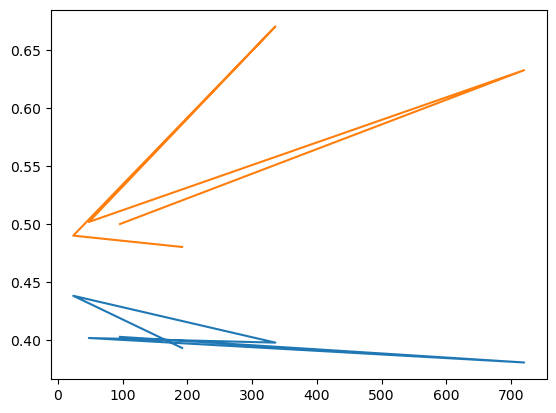

In [12]:
plt.plot(_df_mse)

In [7]:
_df_mse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 192 to 96
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patchtst_supervised  6 non-null      float64
 1   resnet               6 non-null      float64
dtypes: float64(2)
memory usage: 144.0 bytes
